# Capestone Project 1 - Boardgames

Project idea is inspired from board games dateset by Mrpantherson: https://www.kaggle.com/mrpantherson/board-game-data)
Data is collected from gameboardgeek website using a modified python script. The original scrapperi is hosted at: https://github.com/ThaWeatherman/scrapers/tree/master/boardgamegeek

In [1]:
import pandas as pd
import numpy as np   
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats as st

In [2]:
#read csv file scrapped from Boardgamesgeek. It's a large file so it will take time to load.
url= "https://raw.githubusercontent.com/quangthuchien/Springboard-DataScience-CareerTrack/master/Capstone%20project%201%20-%20Boardgames/Data/games.csv"
df = pd.read_csv(url, encoding='utf-8')

#df = pd.read_csv(url, encoding='utf-8', dtype={'id': np.int32, 'type': str, 'name': str, 'yearpublished': str, 'minplayers': str, 'maxplayers': str, 'playingtime': str, 'minplaytime': str, 'maxplaytime': str, 'minage': str, 'users_rated': str, 'average_rating': str, 'bayes_average_rating': str,'total_owners': str, 'total_traders': str, 'total_wanters': str, 'total_wishers': str, 'total_comments': str, 'total_weights': str,'average_weight': str,'desc': str})

## Data Wrangling

In [3]:
#Remove the b tags from data
for col in df:
    if col == 'type':
        pass
    else:
        df[col] = df[col].astype(str)
        df[col] = df[col].str.strip(r"[b']")
        df[col] = df[col].str.replace('"','')
#df.head()

In [4]:
#Convert dataframe into appropriate types
for column in df:
    if (column != 'id') and (column != "type") and (column != "name") and (column != "desc"):
        df[column]=pd.to_numeric(df[column])
#df.dtypes

In [5]:
#Remove null values
pd.isnull(df).any()
df = df.dropna()

In [6]:
#Convert some floats into integers
df.yearpublished = df.yearpublished.astype(int)
df.minplayers = df.minplayers.astype(int)
df.maxplayers = df.maxplayers.astype(int)
df.minage = df.minage.astype(int)

In [7]:
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,...,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight,desc
0,25206,boardgame,Dora the Explorer ABC Game,2006,1,4,10.0,10.0,10.0,3,...,3.20000,0.0000,21,0,0,0,5,0,0.0,From the Publisher:&#10;Explore the alphabet w...
1,130647,boardgame,Cirque du Monstre,2012,3,5,40.0,40.0,40.0,12,...,5.80000,0.0000,19,1,5,20,3,1,1.0,In a world filled with constantly fighting dra...
2,61353,boardgameexpansion,Classic Battletech: Mercenaries Supplemental II,2005,2,6,120.0,120.0,120.0,14,...,7.66667,0.0000,35,0,1,8,0,1,4.0,Pirate or Merc?&#10;&#10;Kell Hounds. Northwin...
3,41687,boardgame,Guacamole,2009,2,4,10.0,10.0,10.0,3,...,5.00000,0.0000,4,0,0,1,4,2,1.0,"A print and play game, designed for the '4 car..."
4,3572,boardgame,Invasion: America,1976,2,5,240.0,240.0,240.0,12,...,6.50543,5.6482,452,15,36,60,95,25,3.2,Invasion: America is a wargame designed by Jim...


## Preliminary Analysis

In [8]:
#only select entries that is board games, don't select board games expansion
bg = df[df.type == 'boardgame']

In [9]:
#excludes game what no one wants
bg = bg[(bg.total_traders != 0) & (bg.total_wanters != 0) & (bg.total_wishers != 0)]

In [10]:
#exclude games that has no data for playing time
bg = bg[(bg.playingtime != 0) & (bg.minplaytime != 0) & (bg.maxplaytime != 0)]

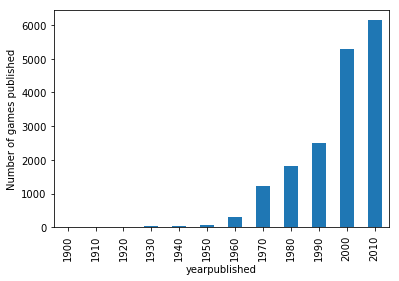

In [11]:
#plot number of games were published in each year recently 
g = bg[bg.yearpublished>1900]
g.groupby(g.yearpublished // 10 * 10).size().plot(kind='bar')
plt.ylabel('Number of games published')

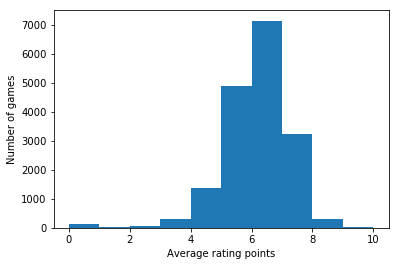

In [12]:
#plot number of game in each average rating point in the recent years
g = bg[bg.yearpublished>1900]
plt.hist(g.average_rating, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) 
plt.xlabel('Average rating points')
plt.ylabel('Number of games')

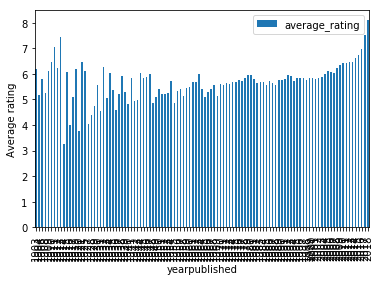

In [13]:
#Plot average rating of all games in a particular year
g = bg[bg.yearpublished>1900]
g = g[['yearpublished', 'average_rating']]
g = g.groupby(g.yearpublished).mean()
g.plot(kind='bar')
plt.ylabel('Average rating')

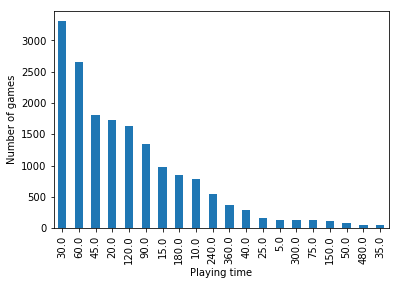

In [14]:
#How much play time for most games?
g = bg[bg.yearpublished>1900]
g = g[['playingtime', 'average_rating']]
g = g.groupby(g.playingtime).size()
g = g.sort_values(ascending=False).head(20)
g.plot(kind = 'bar')
plt.xlabel('Playing time')
plt.ylabel('Number of games')

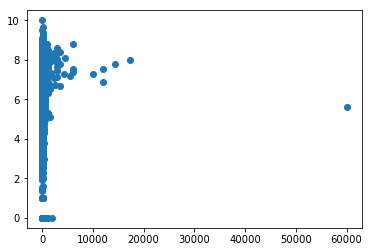

In [15]:
#Playing time effects on ratings
g = bg[bg.yearpublished>1900]
plt.plot(g.playingtime, g.average_rating, "o")

In [16]:
#There seems to be outliers. Most games dont need 60000 minutes (1000 hours or 1.5 months to play)!!
g[g.playingtime>10000]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,...,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight,desc
9910,6942,boardgame,Drang Nach Osten!,1973,2,4,12000.0,12000.0,12000.0,12,...,6.86429,5.55911,150,9,14,27,44,8,4.3750,Introduction:&#10;&#10;Drang Nach Osten! is an...
18187,46669,boardgame,1914: Offensive outrance,2013,2,4,17280.0,17280.0,17280.0,0,...,7.99855,5.64546,434,10,22,68,47,10,3.9000,"(from GMT website:)&#10;&#10;1914, Offensive &..."
23719,254,boardgame,Empires in Arms,1983,2,7,12000.0,6000.0,12000.0,14,...,7.53034,6.49718,1785,62,76,298,463,188,4.4309,(from the back of the box - Avalon Hill editio...
50415,158793,boardgame,Atlantic Wall: D-Day to Falaise,2014,2,6,14400.0,120.0,14400.0,16,...,7.79583,5.57670,184,2,23,68,28,8,4.8750,(from Decision Games' website)&#10;&#10;ON 6 J...
86643,4815,boardgame,The Campaign for North Africa,1979,8,10,60000.0,60000.0,60000.0,14,...,5.62784,5.48719,284,9,37,149,95,29,5.0000,This is a war game like no other. Although th...
90498,152629,boardgame,Marital Bliss,2013,2,2,10080.0,10080.0,10080.0,18,...,7.30000,0.00000,62,1,1,5,5,2,1.0000,At the start of the two-player card game Marit...


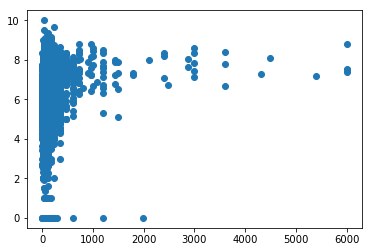

In [17]:
#After checking out the website
#It seems that these numbers are not mistakes but some games really take that long to play.
#Eventhough those game has quite high rating, I remove them from the plot so we can actually see other data points
g = bg[(bg.yearpublished>1900)]
g = g[g.playingtime <10000]
plt.plot(g.playingtime, g.average_rating, "o")

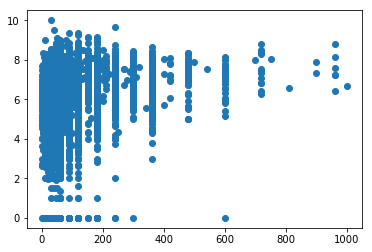

In [18]:
#It seems like after 1000minutes of playing time, most games have similar rating between 6-9
#Let looks at games that takes less than 1000 minutes (16 hrs) to play
g = bg[(bg.yearpublished>1900)]
g = g[g.playingtime <1000]
plt.plot(g.playingtime, g.average_rating, "o")

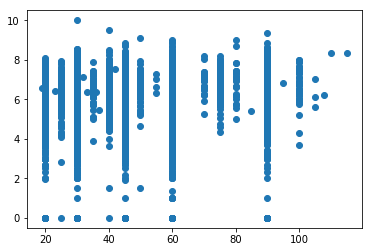

In [19]:
#I plan to have my game last around 30 minutes to an hour
#I wonder what are the ratings for those games
#and would it be beneficial to stretch it out or shorten it more
g = bg[(bg.yearpublished>1900)]
g = g[g.playingtime <120]
g = g[g.playingtime > 15]
plt.plot(g.playingtime, g.average_rating, "o")

In [20]:
#There is no clear correlation between playing time and rating
#I wonder what other factors that will affect rating instead.
#I will need more data on game type and game mechanics
#Meanwhile...

## Inferential Statistics

In [21]:
#See the distribution of current dataset
#average ratings
average_rating = bg.average_rating.sort_values()
pl.plot(average_rating,fit,'-o')
pl.hist(average_rating,normed=True)      #draw histogram of data
pl.show()


NameError: name 'stats' is not defined

In [ ]:
#See the distribution of current dataset
#Max players
maxplayers = bg[(bg.maxplayers<20) & (bg.maxplayers >0)]
maxplayers = maxplayers.maxplayers.sort_values()
fit = stats.norm.pdf(maxplayers, np.mean(maxplayers), np.std(maxplayers)) 
pl.plot(maxplayers,fit,'-o')
pl.hist(maxplayers,normed=True)    
pl.show()


In [ ]:
#create a list of games that requires max 2 players to play
two_players = bg[bg.maxplayers <= 2]
two_players = two_players.average_rating.sort_values()
fit = stats.norm.pdf(two_players, np.mean(two_players), np.std(two_players)) 
pl.plot(two_players,fit,'-o')
pl.hist(two_players,normed=True)    
pl.show() 
two_players.describe()

In [ ]:
#create a list of games that requires max 3-5 players to play
five_players = bg[bg.maxplayers <= 5]
five_players = five_players[five_players.maxplayers > 2]
five_players = five_players.average_rating.sort_values()
fit = stats.norm.pdf(five_players, np.mean(five_players), np.std(five_players)) 
pl.plot(five_players,fit,'-o')
pl.hist(five_players,normed=True)    
pl.show() 
five_players.describe()

In [ ]:
#create a list of games that requires max 5-10 players to play
ten_players = bg[bg.maxplayers <= 10]
ten_players = ten_players[ten_players.maxplayers > 5]
ten_players = ten_players.average_rating.sort_values()
fit = stats.norm.pdf(ten_players, np.mean(ten_players), np.std(ten_players)) 
pl.plot(ten_players,fit,'-o')
pl.hist(ten_players,normed=True)    
pl.show() 
ten_players.describe()

It seems like the more players a game required, the lower its average rating. To test to see if the different is significant, we need to perform z-test

In [ ]:
s_two=1.147679
s_five=1.107455
n= 4778
x_two=6.447140
x_five=6.25

SE_twofive= round((((s_two**2)+(s_five**2))/n)**0.5,2)
#SE
x_diff=round(x_two-x_five,2)
#x_diff

Z= round(((x_diff - 0)/SE_twofive),2)
#Z

#two tailes
p_values = st.norm.sf(abs(Z))*2
print ("p values = ",p_values)
print( "P values is ", round(p_values *100,2),"%", "so there is NOT a significant different between two population")
